<a href="https://colab.research.google.com/github/iynnn/Data-Science/blob/main/SSO_UNS%20grid%20RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input

In [375]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [518]:
import pandas as pd
raw = pd.read_csv('/content/drive/MyDrive/[02] Lomba/[Current] SSO UNS 2023/Final/data baru /DataSSO2023 (1).csv', sep = ";")
df_raw = pd.read_csv('/content/drive/MyDrive/[02] Lomba/[Current] SSO UNS 2023/Final/data baru /DataSSO2023 (1).csv', sep = ";")

In [377]:
raw.head()

,Marital status,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,5,1,122.0,127.3,1,0,0,1,1,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,1,160.0,142.5,1,0,0,0,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,5,1,122.0,124.8,1,0,0,0,1,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,2,1,122.0,119.6,1,0,0,1,0,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,1,0,100.0,141.5,0,0,0,1,0,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [378]:
raw.count()

Marital status                                    4424
Application order                                 4424
Daytime/evening attendance                        4424
Previous qualification (grade)                    4424
Admission grade                                   4424
Displaced                                         4424
Educational special needs                         4424
Debtor                                            4424
Tuition fees up to date                           4424
Gender                                            4424
Scholarship holder                                4424
Age at enrollment                                 4424
International                                     4424
Curricular units 1st sem (credited)               4424
Curricular units 1st sem (enrolled)               4424
Curricular units 1st sem (evaluations)            4424
Curricular units 1st sem (approved)               4424
Curricular units 1st sem (grade)                  4424
Curricular

In [379]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Daytime/evening attendance                      4424 non-null   int64  
 3   Previous qualification (grade)                  4424 non-null   float64
 4   Admission grade                                 4424 non-null   float64
 5   Displaced                                       4424 non-null   int64  
 6   Educational special needs                       4424 non-null   int64  
 7   Debtor                                          4424 non-null   int64  
 8   Tuition fees up to date                         4424 non-null   int64  
 9   Gender                                   

In [380]:
# # mengubah nama dimensi "Daytime/evening attendance"
# raw.rename(columns={'Daytime/evening attendance\t': 'Daytime/evening attendance'}, inplace=True)


# Pemisahan dimensi kategori dan numerik

kat = ['Marital status', 'Application order', 'Daytime/evening attendance',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']

num =['Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
             'Unemployment rate', 'Inflation rate', 'GDP']

# Mengkategorisasi dimensi pada df raw
# Change categorical columns to category datatype.
raw[kat] = raw[kat].astype('category')

In [381]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 29 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Marital status                                  4424 non-null   category
 1   Application order                               4424 non-null   category
 2   Daytime/evening attendance                      4424 non-null   category
 3   Previous qualification (grade)                  4424 non-null   float64 
 4   Admission grade                                 4424 non-null   float64 
 5   Displaced                                       4424 non-null   category
 6   Educational special needs                       4424 non-null   category
 7   Debtor                                          4424 non-null   category
 8   Tuition fees up to date                         4424 non-null   category
 9   Gender                        

## Duplication Check

In [382]:
raw.duplicated().sum()

0

In [426]:
# Remove Duplicate
df = raw.drop_duplicates()
df.duplicated().sum()

0

## Missing Value Check

In [384]:
df.isna().sum()

Marital status                                    0
Application order                                 0
Daytime/evening attendance                        0
Previous qualification (grade)                    0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular u

## 5 Summary Number atau Tabel Deskripsi dari Masing-Masing Variabel

In [385]:
df.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [386]:
df.describe(include=['category', 'O'])

,Marital status,Application order,Daytime/evening attendance,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,8,2,2,2,2,2,2,2,2,3
top,1,1,1,1,0,0,1,0,0,0,Graduate
freq,3919,3026,3941,2426,4373,3921,3896,2868,3325,4314,2209


# Exploratory Data Analysis

In [387]:
import seaborn as sns
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [431]:
# adjust color yang akan digunakan nantinya
colors = sns.color_palette('pastel')
sns.set_palette('pastel')
sns.set_style('ticks')
sns.set_style({'axes.facecolor':'white', 'grid.color': '.8'})

# Assign each categorical variable its own color.
colors_gender = {'Perempuan': colors[3], 'Laki-Laki': colors[0]}
colors_attendance = {'Malam': colors[4], 'Siang': colors[-2]}
colors_binary = {'Yes': colors[2], 'No': colors[3]}
colors_target = {'Graduate': colors[-1], 'Dropout': colors[3], 'Enrolled': colors[2]}

## Visualisasi

### Target

In [389]:
import numpy as np
import math
import matplotlib.pyplot as plt

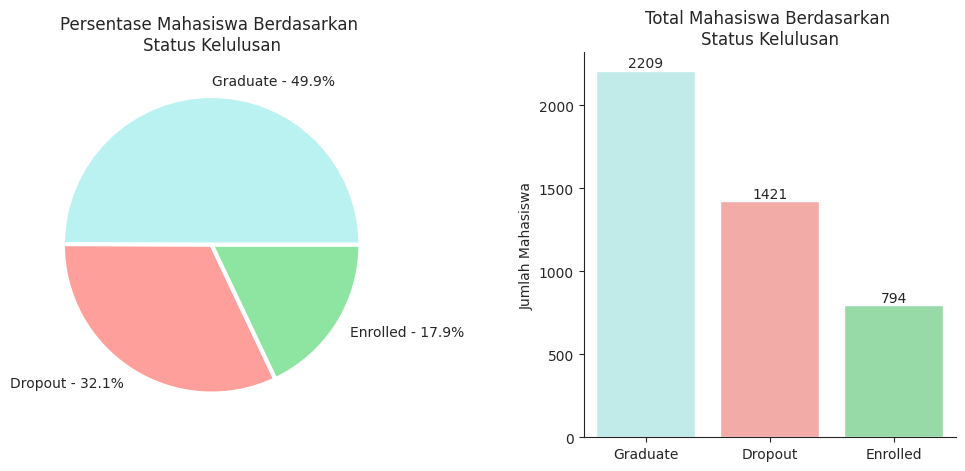

In [390]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Target'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=[colors_target.get(i) for i in data.index])
ax1.set_title('Persentase Mahasiswa Berdasarkan \nStatus Kelulusan')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y=data, x=data.index, palette=colors_target)
# ax2 = sns.countplot(data = df, x = df["Target"], palette = colors_target)
ax2.set(xlabel=None, ylabel='Jumlah Mahasiswa')
ax2.bar_label(container=ax2.containers[0], labels=df['Target'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total Mahasiswa Berdasarkan \nStatus Kelulusan')


plt.show()

### Gender

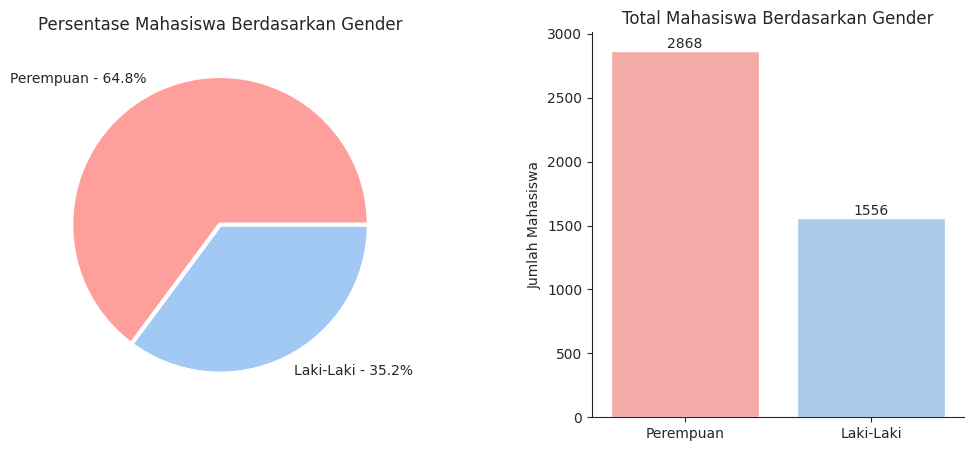

In [391]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Gender'].value_counts()
data.index = ["Perempuan", "Laki-Laki"]
# data = df['Gender'].apply(lambda x: "Male" if x == 1 else "Female")

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=[colors_gender.get(i)for i in data.index])
ax1.set_title('Persentase Mahasiswa Berdasarkan Gender')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y=data, x=data.index, palette=colors_gender)
# ax2 = sns.countplot(data = df, x = df["Gender"])
ax2.set(xlabel=None, ylabel='Jumlah Mahasiswa')
ax2.bar_label(container=ax2.containers[0], labels=df['Gender'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total Mahasiswa Berdasarkan Gender')

plt.show()

### Berdasarkan Gender dan Status Kelulusan

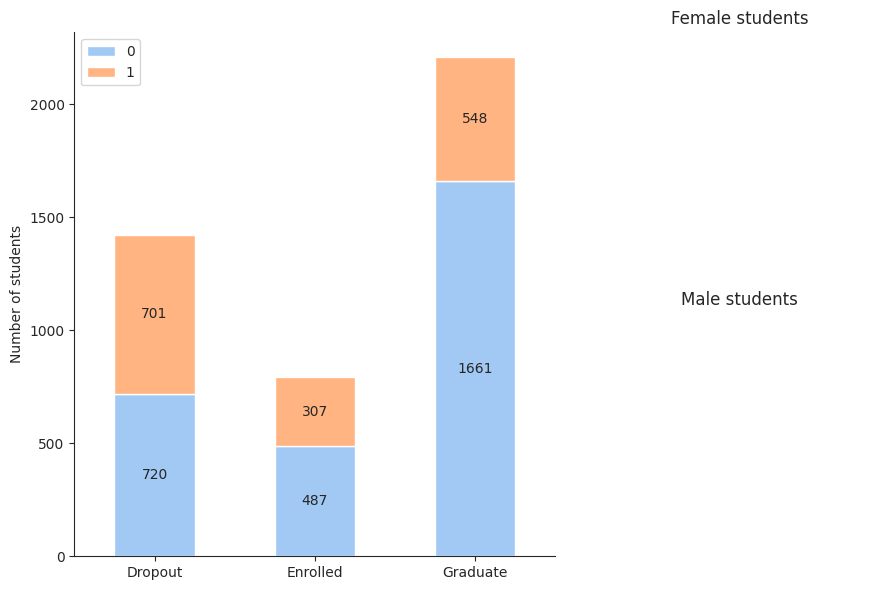

In [467]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=2)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[:, 0])
data = df.groupby(['Gender', 'Target']).size().reset_index().pivot(columns='Gender', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True)
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel=None, ylabel='Number of students')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)

# Create a pie chart for female students.
females = df[(df['Gender'] == 'Perempuan') & (df['Target'] != '')]['Target'].value_counts()
labels = [f'{label} {np.round(females[label] / females.sum() * 100, 1)}%' for label in females.index]
ax2 = fig.add_subplot(gs[0, 1])
patches, texts = ax2.pie(females, labels=labels, colors=[colors_target.get(i) for i in females.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax2.set(title='Female students')


# Create a pie chart for male students.
males = df[(df['Gender'] == 'Laki-Laki') & (df['Target'] != '')]['Target'].value_counts()
labels = [f'{label} - {np.round(males[label] / males.sum() * 100, 1)}%' for label in males.index]
ax5 = fig.add_subplot(gs[1, 1])
ax5.pie(males, labels=labels, colors=[colors_target.get(i) for i in males.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax5.set(title='Male students')

plt.show()

### Distribusi Umur

In [393]:
# Find the optimal number of bins using Sturges’ rule.
bins = int(math.ceil(math.log2(len(df))) + 1)
age_min = df['Age at enrollment'].min()
age_max = df['Age at enrollment'].max()
bin_int = df['Age at enrollment'].max() // bins
bin_edges = [i for i in range(age_min, age_max + bin_int, bin_int)]

# Perform binning on Age at enrollment column.
age_labels = [f'{bin_edges[i]}-{bin_edges[i + 1]}' for i in range(len(bin_edges) - 1)]
df['Age at enrollment bins'] = pd.cut(df['Age at enrollment'], bin_edges, labels=age_labels)

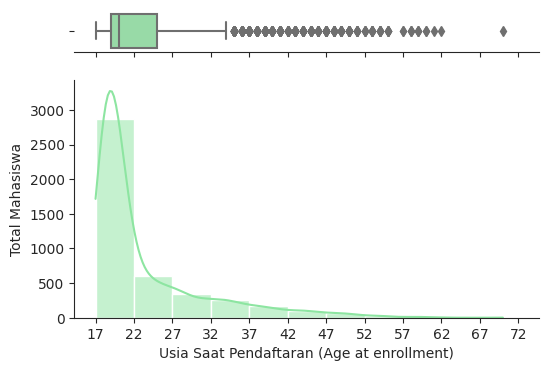

In [394]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 4), gridspec_kw={"height_ratios": (.15, .85)})

# Create a boxplot.
ax1 = sns.boxplot(data=df, x='Age at enrollment', ax=ax1, color = colors[2])
ax1.set(xlabel=None)

# Create a histogram.
labels = df['Age at enrollment'].value_counts()
labels = [f'{label} - {round(males[label] / males.sum() * 100)}%' for label in males.index]
ax2 = sns.histplot(data=df, x='Age at enrollment', ax=ax2, bins=bins, binwidth=bin_int, kde=True, color = colors[2])
ax2.set(ylabel='Total Mahasiswa', xlabel="Usia Saat Pendaftaran (Age at enrollment)")
sns.despine(ax=ax1, left=True)
sns.despine(ax=ax2)


# Adjust x ticks.
plt.xticks(bin_edges)
plt.show()

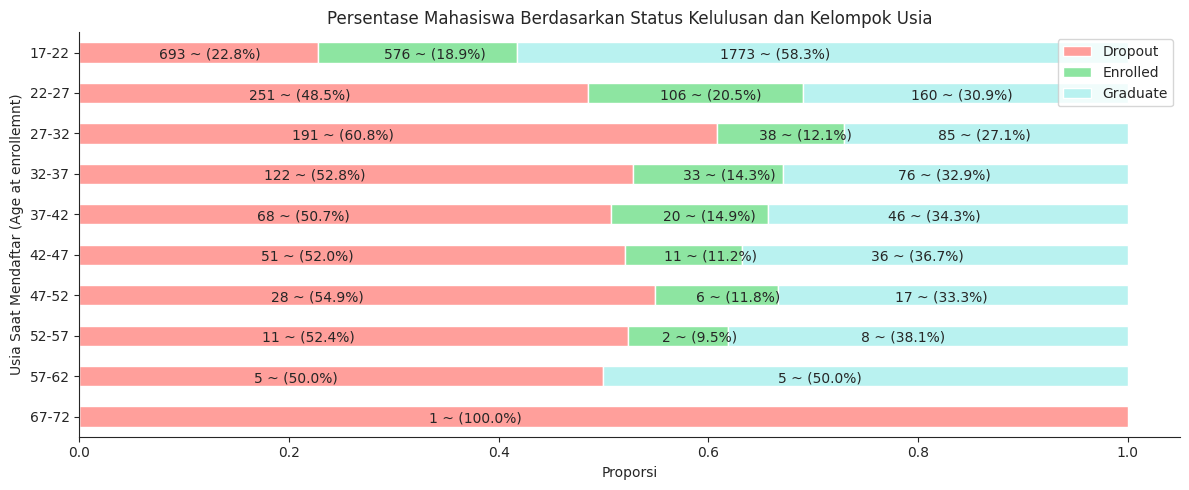

In [395]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=1)

# # Create a histogram.
# ax1 = fig.add_subplot(gs[0, 0])
# ax1 = sns.histplot(data=df, x='Age at enrollment', hue='Target', element='step', bins=bins,
#                   binwidth=bin_int, palette=colors_target)
# ax1.set(ylabel='Number of students')
# ax1.legend_.set_title(None)
# ax1.spines[['right', 'top']].set_visible(False)
# ax1.set_title('Distribusi Mahassiwa Berdasarkan Kelompok Usia \ndan Status Kelulusan')
# plt.xticks([i for i in range(age_min, age_max + bin_int, bin_int)])

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 0])
# data = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'])
data = pd.crosstab(index=df['Age at enrollment bins'], columns=df['Target'])
# data_prop = pd.crosstab(index=df['Age at enrollment bins'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data_prop = pd.crosstab(index=df['Age at enrollment bins'], columns=df['Target'], normalize='index')
labels = [i for i in age_labels if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proporsi', ylabel='Usia Saat Mendaftar (Age at enrollemnt)')
ax2.legend().set_title(None)
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Persentase Mahasiswa Berdasarkan Status Kelulusan dan Kelompok Usia')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        if proportion:
            plt.text(x=(y_loc - proportion) + (proportion / 3), y=n - 0.15, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

### Marital Status

In [409]:
# df = df.replace({'Marital status': {1: 'Lajang', 2: 'Menikah', 3: 'Duda', 4: 'Bercerai',
#                                     5: 'Bersatu Secara Faktual', 6: 'Terpisah Secara Hukum'}})
df = df.replace({'Marital status': {1: 'Single', 2: 'Married', 3: 'Widower', 4: 'Divorced',
                                    5: 'Facto union', 6: 'Legally separated'}})

In [410]:
df["Marital status"].unique()

['Single', 'Married', 'Divorced', 'Widower', 'Facto union', 'Legally separated']
Categories (6, object): ['Single', 'Married', 'Widower', 'Divorced', 'Facto union',
                         'Legally separated']

KeyError: ignored

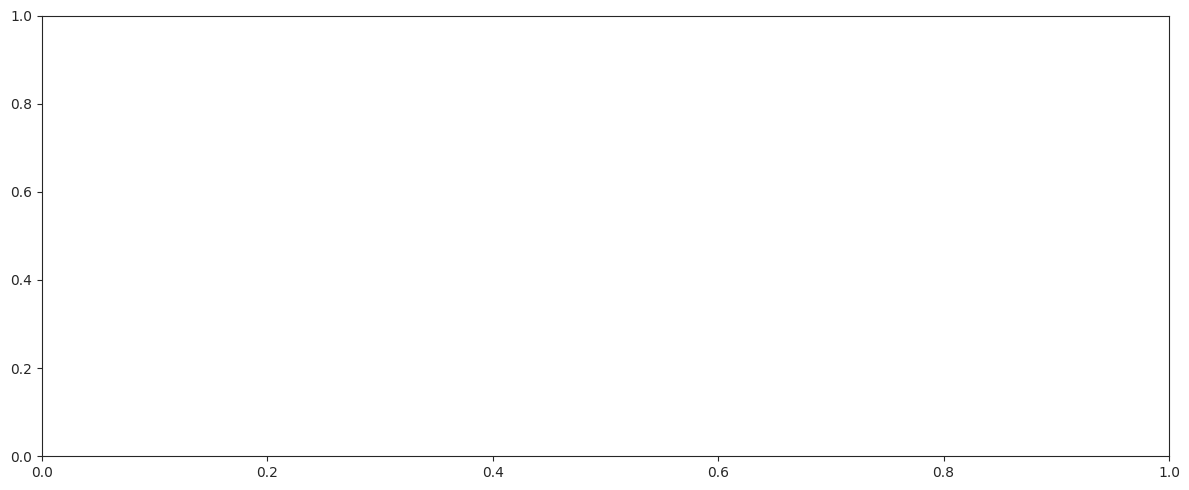

In [414]:
fig = plt.figure(figsize=(12, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=1)

# # Create a bar plot.
# ax1 = fig.add_subplot(gs[0, 0])
# data = df[df['Target'] == 'Enrolled']['Marital status'].value_counts()
# order = data.index
# ax1 = sns.barplot(data=data.to_frame(), y=data, x=data.index, color=colors[4], order=order)
# ax1.set(xlabel=None, ylabel='Number of students')
# ax1.bar_label(container=ax1.containers[0], labels=data)
# ax1.spines[['right', 'top']].set_visible(False)
# ax1.set_title('Total number of enrolled students by marital status')
# plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 0])
# data = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'])
# data_prop = pd.crosstab(index=df['Marital status'], columns=df[df['Target'] != 'Enrolled']['Target'], normalize='index')
data = pd.crosstab(index=df['Marital status'], columns=df['Target'])
data_prop = pd.crosstab(index=df['Marital status'], columns=df['Target'], normalize='index')

data_prop.loc[order[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proporsi', ylabel='Status Pernikahan (Marital status)')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Persentase Mahasiswa Berdasarkan Status Kelulusan dengan Status Pernikahan')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[order[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()

### Application Order

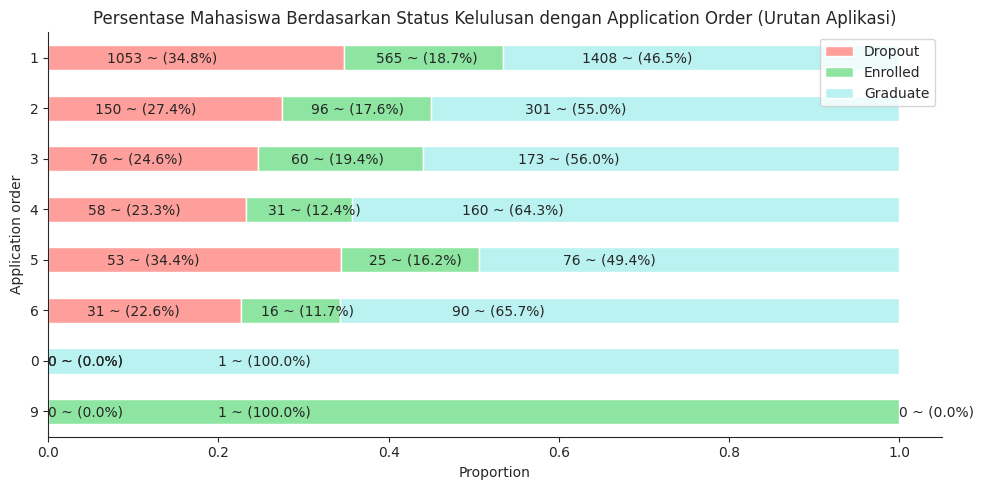

In [419]:
fig = plt.figure(figsize=(10, 5), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=1)

# # Create a bar plot.
# ax1 = fig.add_subplot(gs[0, 0])
# data = df['Application order'].value_counts()
# order = data.index
# ax1 = sns.barplot(data=data.to_frame(), y=data, x=data.index, color=colors[4], order=order)
# ax1.set(xlabel='Application order', ylabel='Number of students')
# ax1.bar_label(container=ax1.containers[0], labels=data)
# ax1.spines[['right', 'top']].set_visible(False)
# ax1.set_title('Total number of enrolled students by application order')
# plt.xticks(rotation=15)

# Create a stacked bar plot.
ax2 = fig.add_subplot(gs[0, 0])
data = pd.crosstab(index=df['Application order'], columns=df['Target'])
data_prop = pd.crosstab(index=df['Application order'], columns=df['Target'], normalize='index')
labels = [i for i in order if i in data.index]
data_prop.loc[labels[::-1]].plot(ax=ax2, kind='barh', stacked=True, color=[colors_target.get(i) for i in data.columns])
ax2.set(xlabel='Proportion', ylabel='Application order')
ax2.spines[['right', 'top']].set_visible(False)
ax2.legend_.set_title(None)
ax2.set_title('Persentase Mahasiswa Berdasarkan Status Kelulusan dengan Application Order (Urutan Aplikasi)')
plt.xticks(rotation=0)

for n, x in enumerate([*data.loc[labels[::-1]].index.values]):
    for (proportion, count, y_loc) in zip(data_prop.loc[x], data.loc[x], data_prop.loc[x].cumsum()):
        plt.text(x=(y_loc - proportion) + (proportion / 5), y=n - 0.1, s=f'{count} ~ ({np.round(proportion * 100, 1)}%)')

plt.show()


### Attendance

In [427]:
df = df.replace({'Daytime/evening attendance': {0: 'Malam', 1: 'Siang'}})
df['Daytime/evening attendance']

0       Siang
1       Siang
2       Siang
3       Siang
4       Malam
        ...  
4419    Siang
4420    Siang
4421    Siang
4422    Siang
4423    Siang
Name: Daytime/evening attendance, Length: 4424, dtype: category
Categories (2, object): ['Malam', 'Siang']

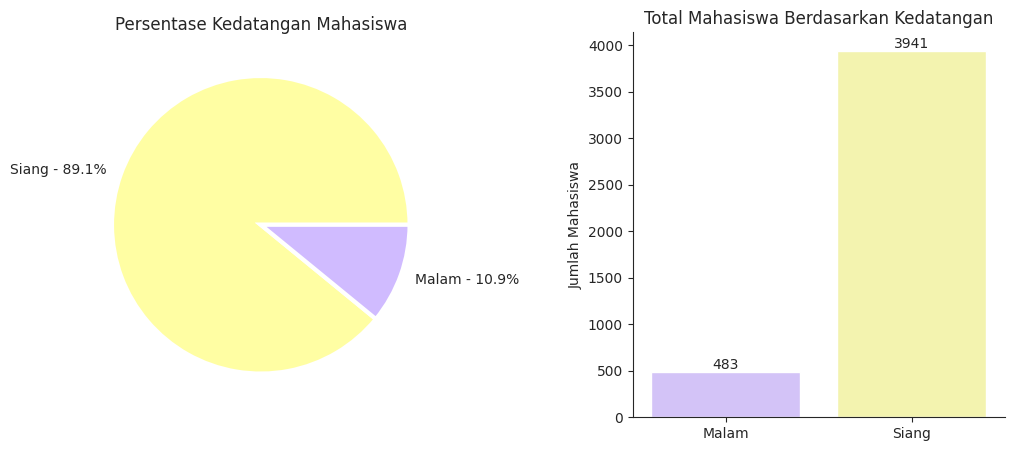

In [475]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)

data = df['Daytime/evening attendance'].value_counts()

# Create a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, colors=[colors_attendance.get(i) for i in data.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax1.set_title('Persentase Kedatangan Mahasiswa')

# Create a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y=data, x=data.index, palette=colors_attendance)
ax2.set(xlabel=None, ylabel='Jumlah Mahasiswa')
ax2.bar_label(container=ax2.containers[0], labels=df['Daytime/evening attendance'].value_counts().sort_index())
ax2.set_title('Total Mahasiswa Berdasarkan Kedatangan')
ax2.spines[['right', 'top']].set_visible(False)

plt.show()

### Berdasarkan Kedatangan dan Status Kelulusan

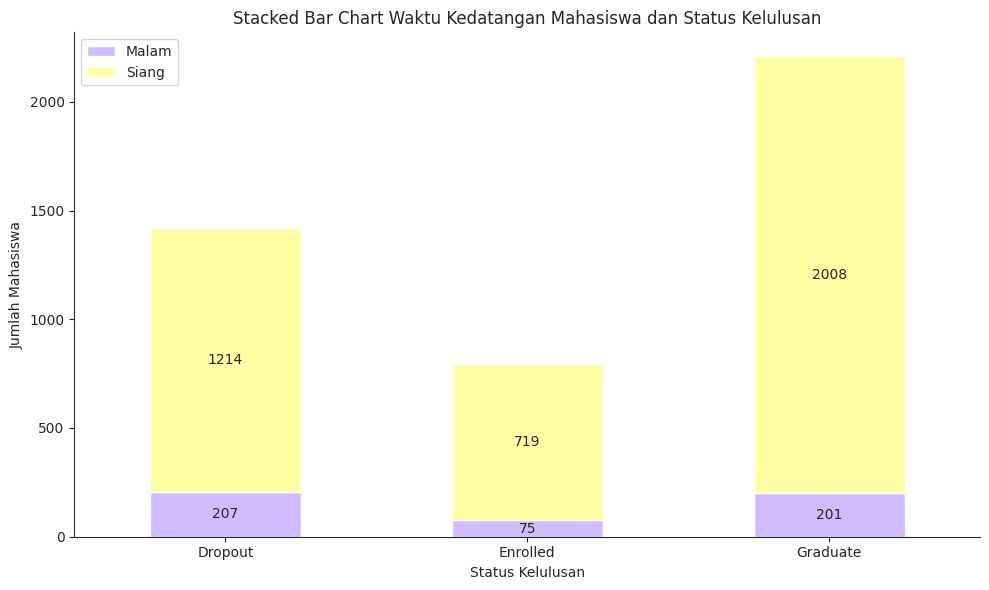

In [439]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=1)

# Create a stacked barchart.
ax1 = fig.add_subplot(gs[0, 0])
data = df.groupby(['Daytime/evening attendance',
                   'Target']).size().reset_index().pivot(columns='Daytime/evening attendance', index='Target', values=0)
data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_attendance.get(i) for i in data.columns])
for cont in ax1.containers:
    ax1.bar_label(cont, label_type='center')
ax1.spines[['right', 'top']].set_visible(False)
ax1.set(xlabel='Status Kelulusan', ylabel='Jumlah Mahasiswa')
ax1.legend_.set_title(None)
plt.xticks(rotation=0)
ax1.set_title("Stacked Bar Chart Waktu Kedatangan Mahasiswa dan Status Kelulusan")


# # Create a pie chart for daytime students.
# daytime = df[(df['Daytime/evening attendance'] == 'Daytime') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
# labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
# ax7 = fig.add_subplot(gs[0, 1])
# patches, texts = ax7.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index],
#         wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
# ax7.set(title='Daytime students')

# # Create a pie chart for evening students.
# evening = df[(df['Daytime/evening attendance'] == 'Evening') & (df['Target'] != 'Enrolled')]['Target'].value_counts()
# labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
# ax3 = fig.add_subplot(gs[1, 1])
# ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index],
#         wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
# ax3.set(title='Evening students')

plt.show()

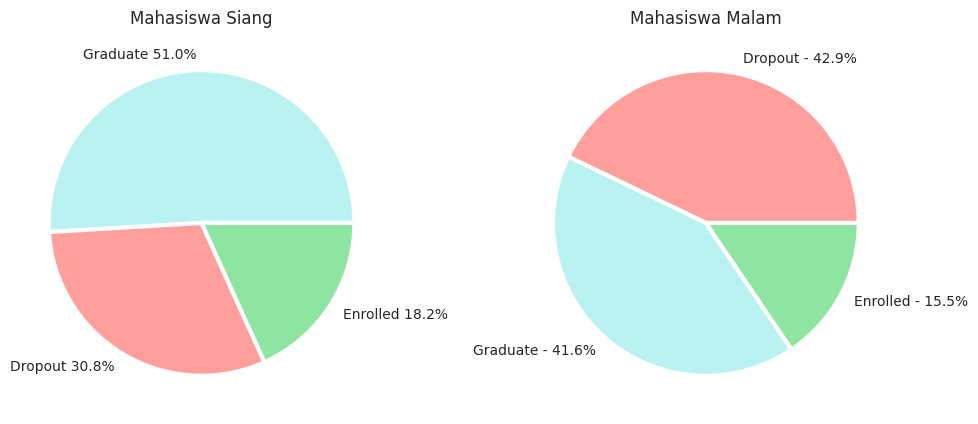

In [466]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
gs = fig.add_gridspec(nrows=1, ncols=2)

# Create a pie chart for daytime students.
daytime = df[(df['Daytime/evening attendance'] == 'Siang') & (df['Target'] != '')]['Target'].value_counts()
labels = [f'{label} {np.round(daytime[label] / daytime.sum() * 100, 1)}%' for label in daytime.index]
ax7 = fig.add_subplot(gs[0, 0])
patches, texts = ax7.pie(daytime, labels=labels, colors=[colors_target.get(i) for i in daytime.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax7.set(title='Mahasiswa Siang')

# Create a pie chart for evening students.
evening = df[(df['Daytime/evening attendance'] == 'Malam') & (df['Target'] != '')]['Target'].value_counts()
labels = [f'{label} - {np.round(evening[label] / evening.sum() * 100, 1)}%' for label in evening.index]
ax3 = fig.add_subplot(gs[0, 1])
ax3.pie(evening, labels=labels, colors=[colors_target.get(i) for i in evening.index],
        wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
ax3.set(title='Mahasiswa Malam')
plt.show()

### Variabel dengan 2 kategori

In [476]:
cols = ['Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International']
# Replace 0 and 1 values with No and Yes respectively.
for col in cols:
    df = df.replace({col: {0: 'No', 1: 'Yes'}})

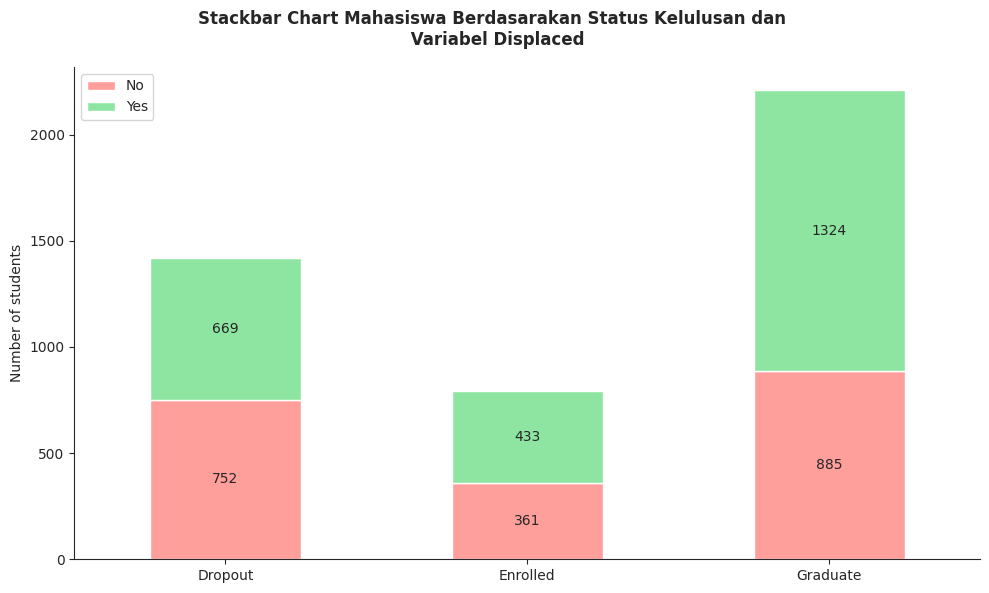

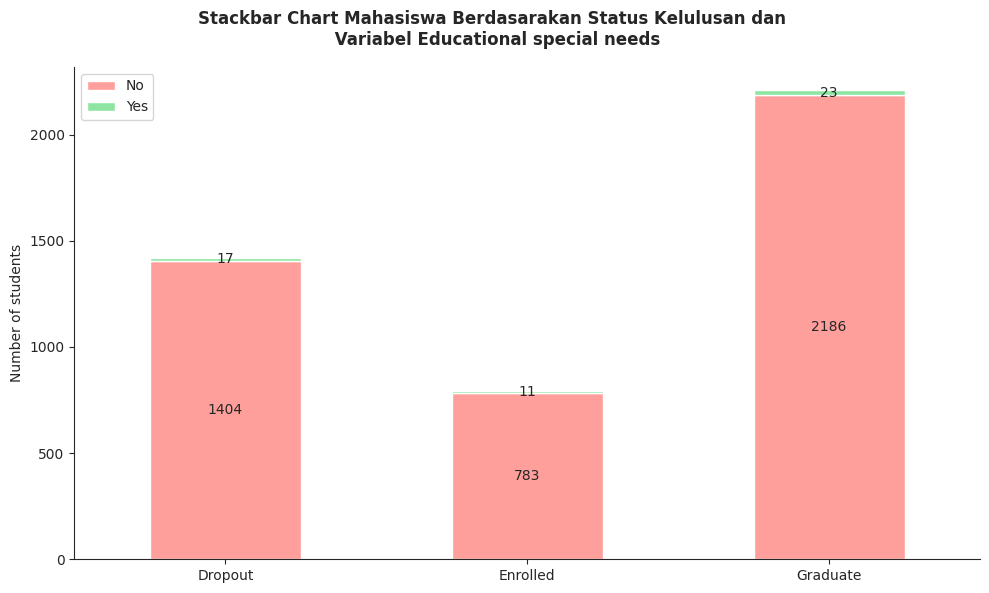

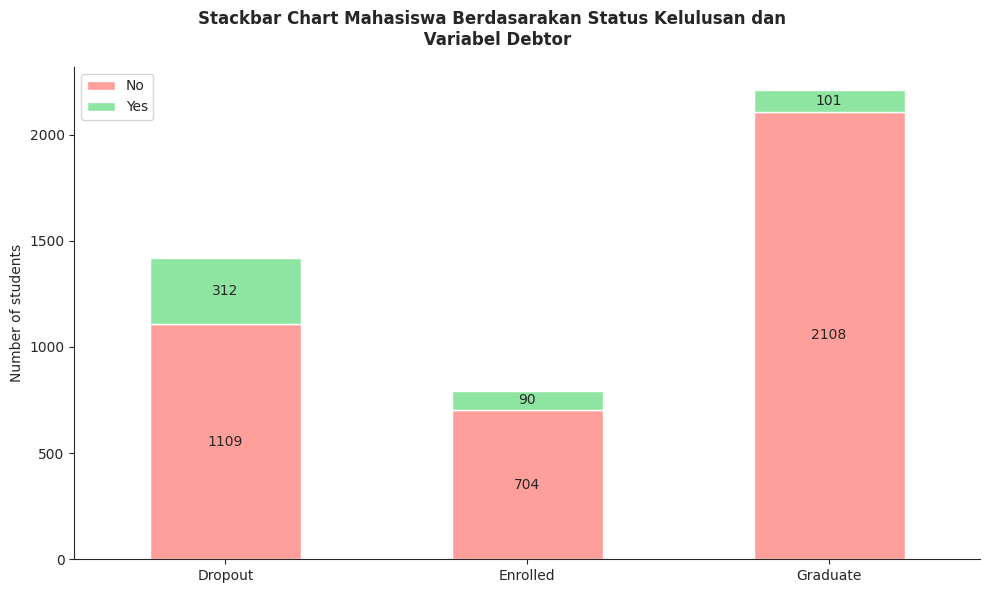

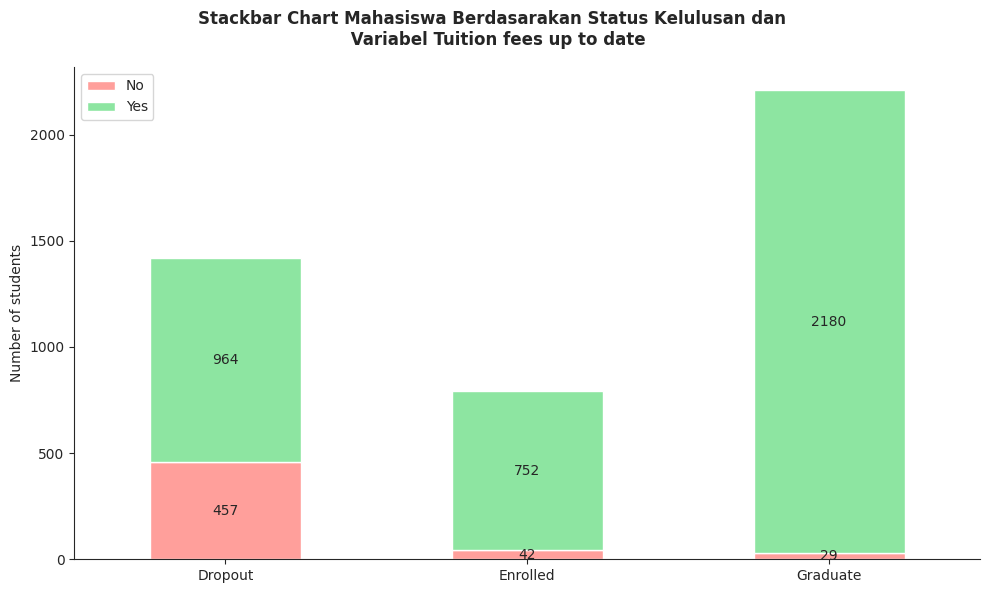

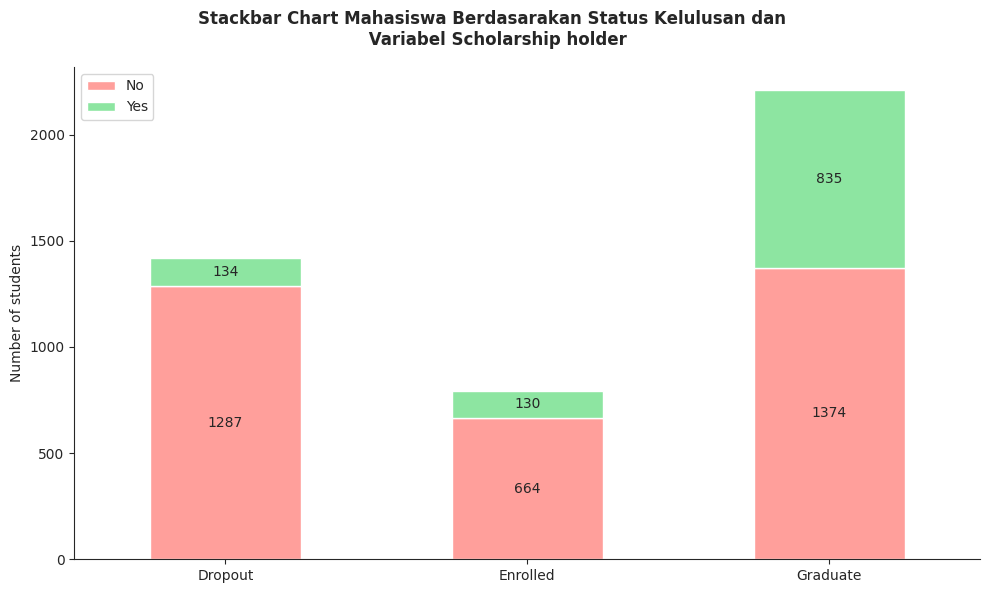

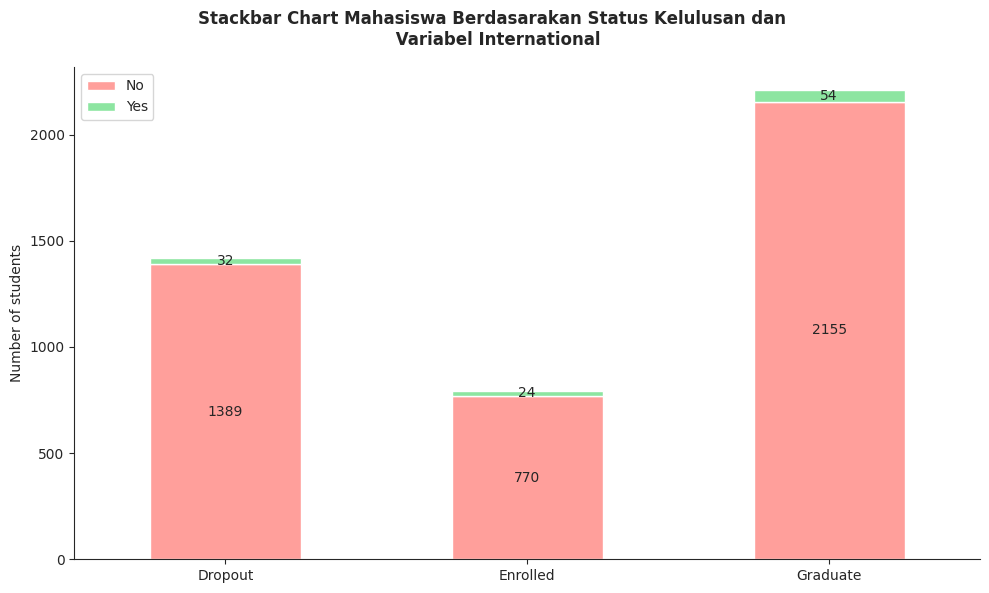

In [485]:
for col in cols:
    fig = plt.figure(figsize=(10, 6), tight_layout=True)
    gs = fig.add_gridspec(nrows=1, ncols=1)

    # Create a stacked barchart.
    ax1 = fig.add_subplot(gs[:, 0])
    data = df.groupby([col, 'Target']).size().reset_index().pivot(columns=col,
                                                                  index='Target', values=0)
    data.plot(ax=ax1, kind='bar', stacked=True, color=[colors_binary.get(i) for i in data.columns])
    for cont in ax1.containers:
        ax1.bar_label(cont, label_type='center')
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.set(xlabel=None, ylabel='Number of students')
    ax1.legend_.set_title(None)
    plt.xticks(rotation=0)

    # # Create a pie chart with parameter Yes.
    # yes = df[(df[col] == 'Yes') & (df['Target'] != '')]['Target'].value_counts()
    # labels = [f'{label} {np.round(daytime[label] / yes.sum() * 100, 1)}%' for label in yes.index]
    # ax2 = fig.add_subplot(gs[0, 1])
    # patches, texts = ax2.pie(yes, labels=labels, colors=[colors_target.get(i) for i in yes.index],
    #         wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    # ax2.set(title='Yes')

    # # Create a pie chart with parameter No.
    # no = df[(df[col] == 'No') & (df['Target'] != '')]['Target'].value_counts()
    # labels = [f'{label} - {np.round(evening[label] / no.sum() * 100, 1)}%' for label in no.index]
    # ax3 = fig.add_subplot(gs[1, 1])
    # ax3.pie(no, labels=labels, colors=[colors_target.get(i) for i in no.index],
    #         wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'})
    # ax3.set(title='No')

    fig.suptitle(f'Stackbar Chart Mahasiswa Berdasarakan Status Kelulusan dan \n Variabel {col}', weight='bold')

    plt.show()


## Numerik

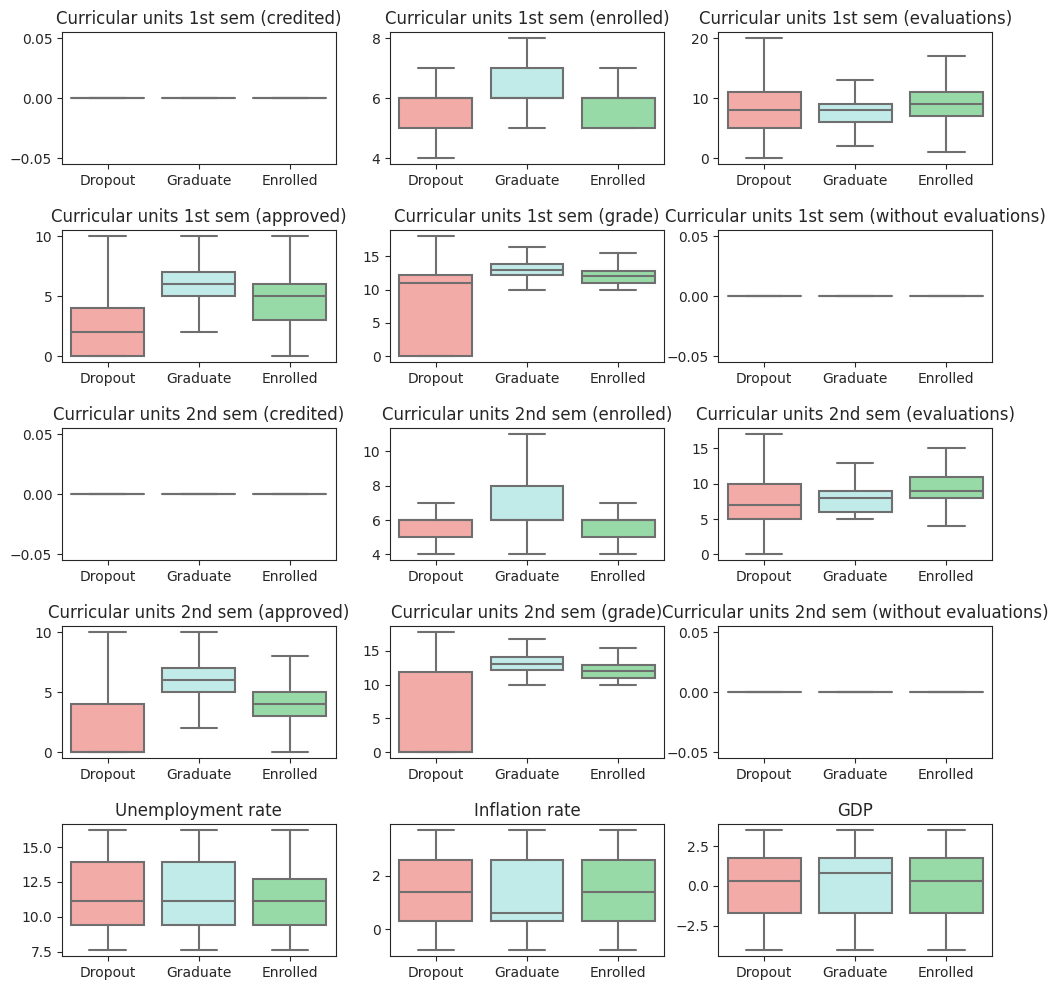

In [486]:
fig, axs = plt.subplots(5, 3, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)
cols = ['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

index = 0

for i in range(5):
    for j in range(3):
        sns.boxplot(df, x='Target', y=cols[index], showfliers=False, palette=colors_target, ax=axs[i, j])
        axs[i, j].set(xlabel=None, ylabel=None, title=cols[index])
        index += 1

# Preprocessing

## Feature Engineering

### Matrix Correlation

<ipython-input-500-81cda0211a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw.corr(),annot=True, cmap='RdBu',vmax=1, vmin=-1, center=0,


<function matplotlib.pyplot.show(close=None, block=None)>

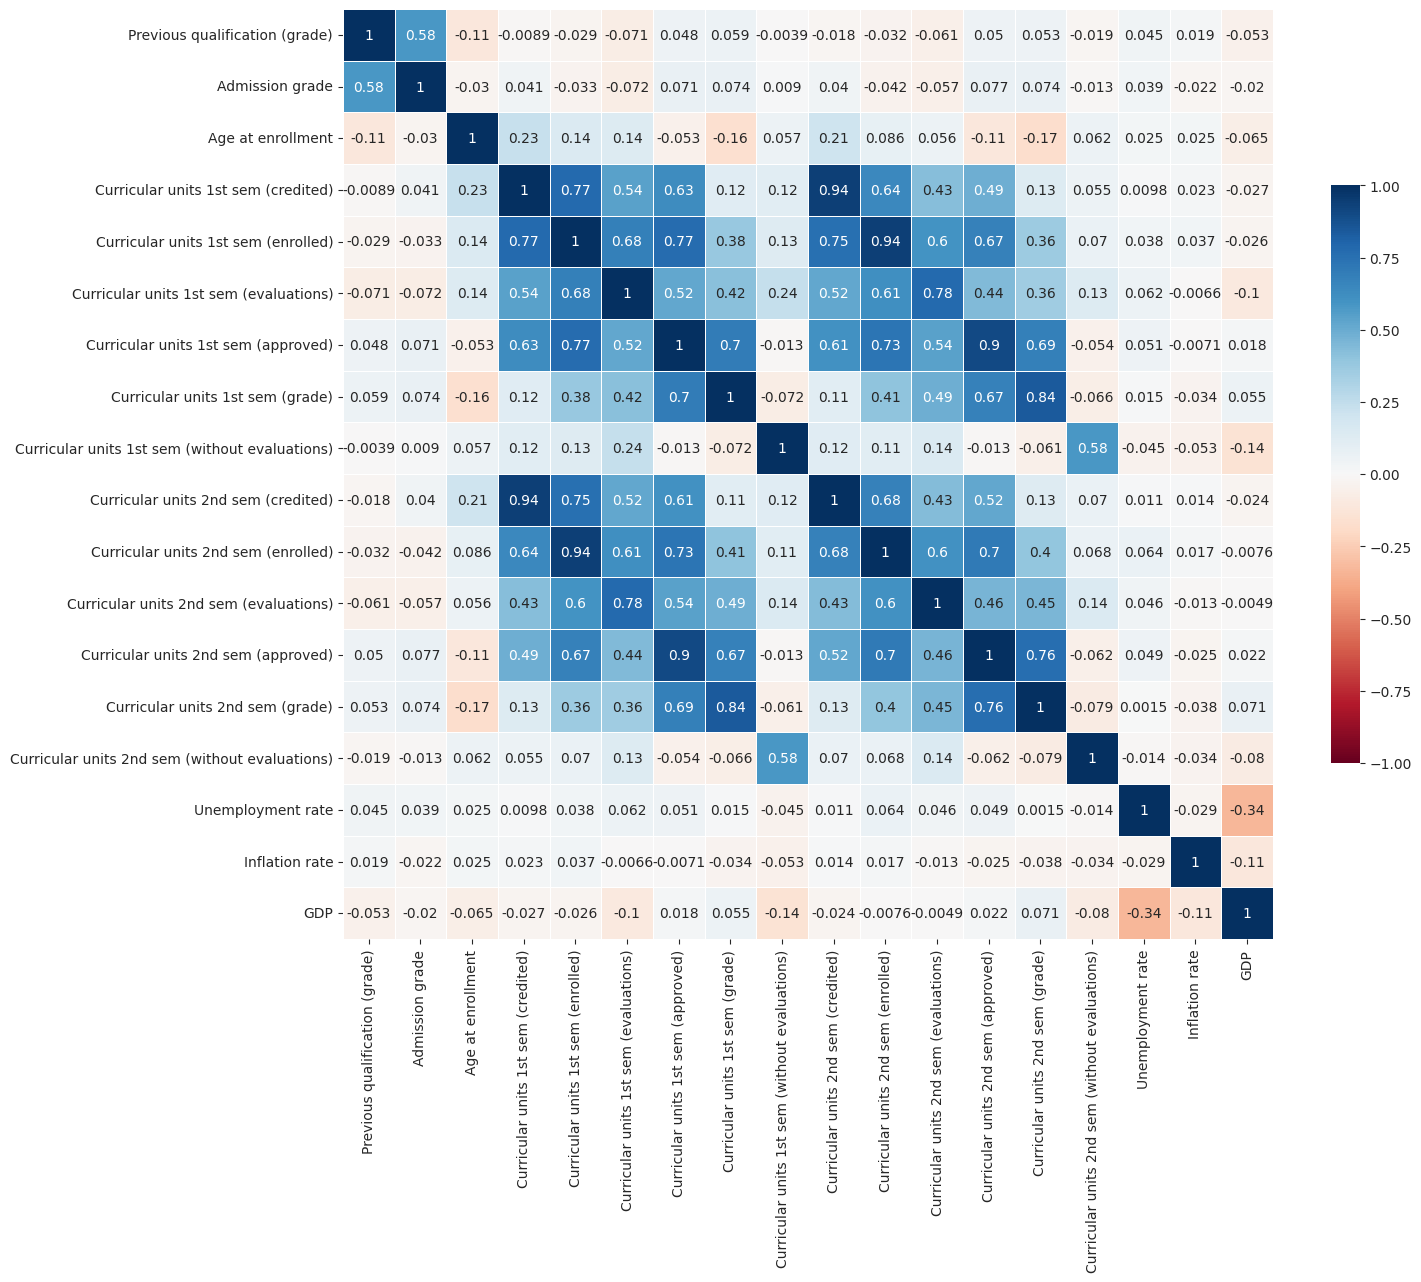

In [500]:
f = plt.figure(figsize=(15, 15))
sns.heatmap(raw.corr(),annot=True, cmap='RdBu',vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

In [492]:
# !pip install dython
# from dython.nominal import associations

### Associassion Matrix

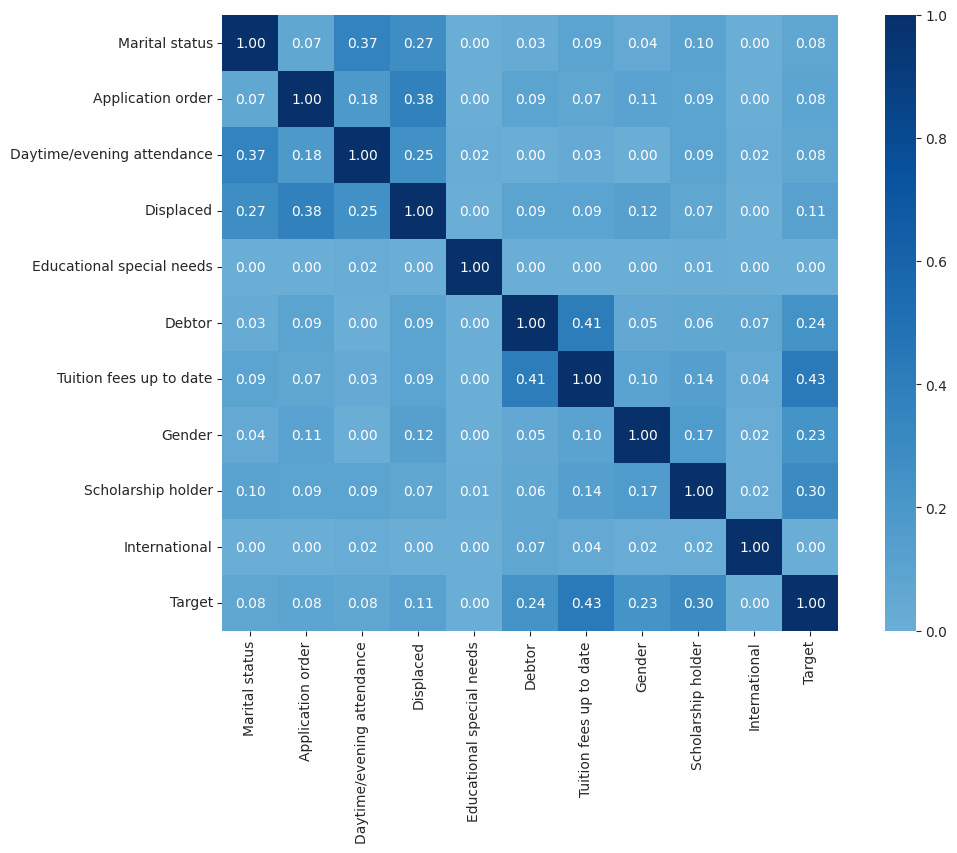

In [495]:
cols = ['Marital status', 'Application order',  'Daytime/evening attendance',
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

fig, ax = plt.subplots(figsize = (12, 8))

# Estimate and generate Cramer's V association plot.
cramers_v = associations(df[cols], nom_nom_assoc='cramer', ax=ax, cmap='Blues')

## Feature Selection

In [627]:
# Dipilihlah dimensi yang tidak memiliki korelasi lebih dari 0.7
# var = ['Marital status', 'Application order',  'Daytime/evening attendance',
#         'Displaced', 'Educational special needs', 'Debtor',
#         'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International',
#          'Age at enrollment',
#           'Curricular units 1st sem (without evaluations)',
#           'Curricular units 2nd sem (credited)',
#           'Curricular units 2nd sem (evaluations)',
#           'Curricular units 2nd sem (without evaluations)',
#           'Unemployment rate', 'Inflation rate', 'GDP',
#         'Target']

var = [ 'Tuition fees up to date',
        'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)',
        'Curricular units 2nd sem (approved)', 'Target']

# Feature Selection
df = df_raw[var]

# Coding variabel target
df = df.replace({'Target': {'Dropout': 0, 'Enrolled' : 1,'Graduate': 2}})

# cat = ['Marital status', 'Application order',  'Daytime/evening attendance',
#         'Displaced', 'Educational special needs', 'Debtor',
#         'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
# df[cat] = df[cat].astype('int32')

# Perform one-hot encoding.
df = pd.get_dummies(df, drop_first=True)

# Modelling

In [628]:
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [629]:
results = pd.DataFrame(columns=['Metode', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [630]:
y = df['Target']

X = df.copy()
X = X.drop('Target', axis = 1)

# Data Training dan Data Testing 0.8 dan 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fungsi Confussion Matrix

In [631]:
def conf_matrix_plot(model, x_data, y_data):

    model_pred = model.predict(x_data)
    cm = metrics.confusion_matrix(y_data, model_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Dropout', 'Enrolled','Graduate'], )
    disp.plot(values_format='')
    plt.show()

### Fungsi Plot ROC

In [632]:
def plot_roc_curve(true_y, y_prob):

    fpr, tpr, thresholds = metrics.roc_curve(true_y, y_prob, pos_label = 0)
    auc = metrics.roc_auc_score(true_y, y_prob,multi_class='ovr')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.text(0.95, 0.05, 'AUC = %0.3f' % auc, ha='right', weight='bold')

### Fungsi Hasil

In [633]:
def print_results(algo, y_test, y_preds):

    global results
    print(algo)
    print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_preds))
    print("Precision:", "%.3f" % metrics.precision_score(y_test, y_preds,pos_label='positive',average='micro'))
    print("Recall:", "%.3f" % metrics.recall_score(y_test, y_preds,pos_label='positive',average='micro'))
    print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_preds,pos_label='positive',average='micro'))
    # Write results into a dataframe.
    row = {'Algorithm': algo, 'Accuracy': metrics.accuracy_score(y_test, y_preds),
           'Precision': metrics.precision_score(y_test, y_preds,pos_label='positive',average='micro'), 'Recall': metrics.recall_score(y_test, y_preds,pos_label='positive',average='micro'),
           'F1 Score': metrics.f1_score(y_test, y_preds,pos_label='positive',average='micro')}
    results = pd.concat([results, pd.DataFrame(row, index=[0])], ignore_index=True)
    results = results.reset_index(drop=True)

## Model Logistic Regression

In [634]:
logmodel = LogisticRegression(max_iter=10000)

In [635]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [636]:
LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [637]:
predictions = logmodel.predict(X_test)

In [638]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(metrics.classification_report(y_test,predictions))
print("\n")
print(metrics.confusion_matrix(y_test,predictions))

Accuracy:  0.7389830508474576


              precision    recall  f1-score   support

           0       0.72      0.81      0.76       284
           1       0.00      0.00      0.00       151
           2       0.75      0.94      0.83       450

    accuracy                           0.74       885
   macro avg       0.49      0.58      0.53       885
weighted avg       0.61      0.74      0.67       885



[[231   1  52]
 [ 62   0  89]
 [ 27   0 423]]


## KNN

In [639]:
from sklearn.neighbors import KNeighborsClassifier

In [640]:
knn = KNeighborsClassifier(n_neighbors=1)

In [641]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [642]:
predictions = knn.predict(X_test)

In [643]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.6689265536723163


              precision    recall  f1-score   support

           0       0.66      0.66      0.66       284
           1       0.36      0.39      0.38       151
           2       0.79      0.77      0.78       450

    accuracy                           0.67       885
   macro avg       0.60      0.61      0.60       885
weighted avg       0.67      0.67      0.67       885



[[187  53  44]
 [ 42  59  50]
 [ 54  50 346]]


In [644]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

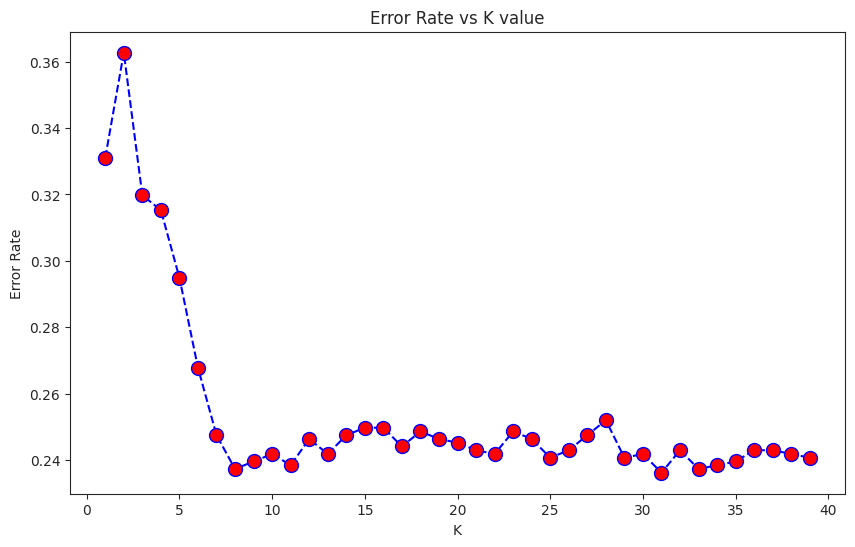

In [645]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# plt.savefig("Error Rate vs K value.png") # save as png

In [667]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [668]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7627118644067796


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       284
           1       0.55      0.34      0.42       151
           2       0.80      0.91      0.85       450

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



[[216  23  45]
 [ 43  51  57]
 [ 24  18 408]]


## Random Forest

In [648]:
rfc = RandomForestClassifier(n_estimators=200)

In [649]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [650]:
predictions = rfc.predict(X_test)

In [651]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7570621468926554


              precision    recall  f1-score   support

           0       0.77      0.76      0.76       284
           1       0.47      0.36      0.41       151
           2       0.82      0.89      0.85       450

    accuracy                           0.76       885
   macro avg       0.69      0.67      0.68       885
weighted avg       0.74      0.76      0.75       885



[[216  33  35]
 [ 44  55  52]
 [ 22  29 399]]


## SVC

In [652]:
model = SVC()

In [653]:
model.fit(X_train,y_train)

SVC()

In [654]:
predictions = model.predict(X_test)

In [655]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7299435028248588


              precision    recall  f1-score   support

           0       0.77      0.74      0.75       284
           1       0.50      0.04      0.07       151
           2       0.72      0.96      0.82       450

    accuracy                           0.73       885
   macro avg       0.66      0.58      0.55       885
weighted avg       0.70      0.73      0.67       885



[[209   6  69]
 [ 44   6 101]
 [ 19   0 431]]


## Grid Search CV

In [656]:
from sklearn.model_selection import GridSearchCV

In [657]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}


In [674]:
cv_params = {'n_estimators' : [25, 50, 75, 100],
              'max_depth' : [10, 30, 50, 70],
              'min_samples_leaf' : [0.5, 0.75, 1],
              'min_samples_split' : [0.001, 0.005, 0.01],
              'max_features' : ['sqrt'],
              'max_samples' : [.3, .5, .7, .9]}

In [676]:

grid = GridSearchCV(rfc,cv_params,verbose=3)

In [677]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=25;, score=0.497 total time=   0.2s
[CV 2/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=25;, score=0.497 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=25;, score=0.497 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=25;, score=0.497 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=25;, score=0.496 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=sqrt, max_samples=0.3, min_samples_leaf=0.5, min_samples_split=0.001, n_estimators=50;, score=0.497 t

GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'max_depth': [10, 30, 50, 70],
                         'max_features': ['sqrt'],
                         'max_samples': [0.3, 0.5, 0.7, 0.9],
                         'min_samples_leaf': [0.5, 0.75, 1],
                         'min_samples_split': [0.001, 0.005, 0.01],
                         'n_estimators': [25, 50, 75, 100]},
             verbose=3)

In [660]:
grid.best_estimator_

SVC(C=100, gamma=0.01)

In [661]:
grid.best_params_

{'C': 100, 'gamma': 0.01}

In [662]:
grid.best_score_

0.7471024221066175

In [663]:
predictions = grid.predict(X_test)

In [664]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7638418079096045


              precision    recall  f1-score   support

           0       0.80      0.73      0.76       284
           1       0.56      0.36      0.44       151
           2       0.79      0.92      0.85       450

    accuracy                           0.76       885
   macro avg       0.71      0.67      0.68       885
weighted avg       0.75      0.76      0.75       885



[[208  30  46]
 [ 30  55  66]
 [ 23  14 413]]
